# Project Overview

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Business Case/Problem

## Data Description

## Data Load

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Features to remove: 
- 'yr_renovated': large number of missing data.

## Data Cleaning

Let's review columns to see which ones make the most sense to keep.

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
def filter_columns(df):
    columns_to_keep = ['price','bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'floors', 
                   'condition',
                  'grade',
                  'sqft_above',
                  'yr_built',
                  'zipcode'
                  ]
    return df[columns_to_keep]

In [7]:
df_filtered = filter_columns(df)

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   sqft_above   21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [9]:
df_filtered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000


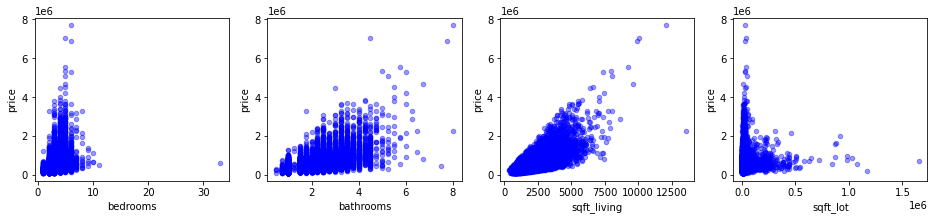

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 
                     'bathrooms',
                     'sqft_living',
                     'sqft_lot', 
                     ], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

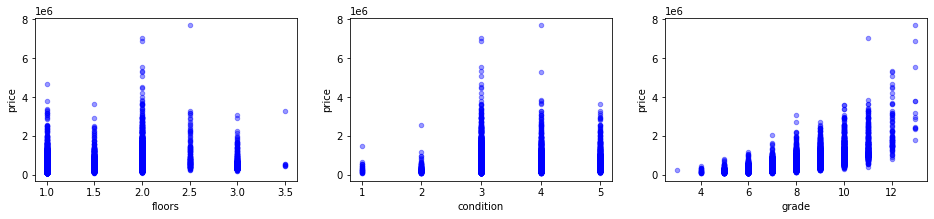

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['floors',
                     'condition',
                     'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

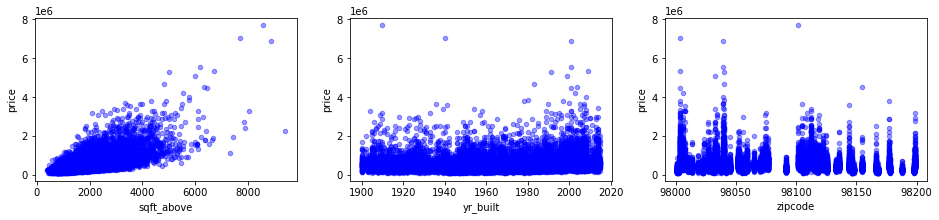

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_above',
                    'yr_built',
                    'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

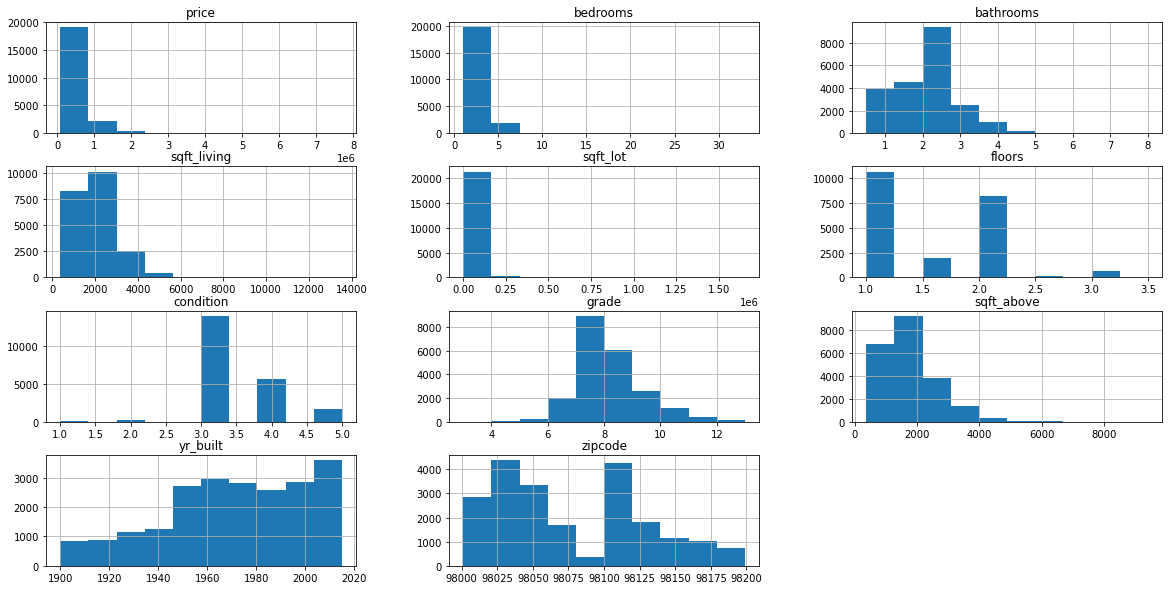

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_filtered.hist(ax = ax);

### Check for Multicollinearity

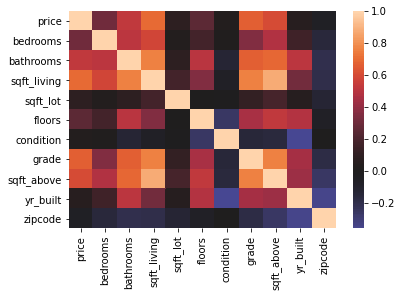

In [14]:
sns.heatmap(df_filtered.corr(), center=0);

# Model A (Simple Model)

## Feature Engineering

In [15]:
price_a = df_filtered['price']
bedrooms_a = df_filtered['bedrooms']
bathrooms_a = df_filtered['bathrooms']
sqft_living_a = df_filtered['sqft_living']
grade_a = df_filtered['grade']

In [16]:
simple_model_ols = pd.concat([price_a, bedrooms_a, bathrooms_a, sqft_living_a, grade_a], axis=1)
simple_model_ols.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7
1,538000.0,3,2.25,2570,7
2,180000.0,2,1.00,770,6
3,604000.0,4,3.00,1960,7
4,510000.0,3,2.00,1680,8


### Split Data into Training and Test set

In [155]:
target_a = simple_model_ols['price']
features_a = simple_model_ols.drop(['price'], axis=1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(features_a,target_a,test_size=0.2,random_state=42)
X_train_a

,bedrooms,bathrooms,sqft_living,grade
6243,4,2.00,1440,7
8986,3,1.75,1430,7
9419,4,2.75,3120,9
10155,4,2.50,2060,7
10436,3,2.00,2500,7
...,...,...,...,...
11964,3,2.50,2230,7
21575,4,2.75,2770,8
5390,4,1.50,1530,6
860,1,0.75,380,5


## Model A Training

In [18]:
outcome_a = 'y_train_a'
predictors_a = X_train_a
pred_sum_a = '+'.join(predictors_a.columns)
formula_a = outcome_a + '~' + pred_sum_a

In [19]:
data_a = pd.concat([X_train_a,y_train_a], axis=1)
data_a.head()

,bedrooms,bathrooms,sqft_living,grade,price
6243,4,2.00,1440,7,332500.0
8986,3,1.75,1430,7,390000.0
9419,4,2.75,3120,9,800000.0
10155,4,2.50,2060,7,462000.0
10436,3,2.00,2500,7,695000.0


In [20]:
model_a_ols = ols(formula=formula_a, data=data_a).fit()
model_a_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_a   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5184.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:59:44   Log-Likelihood:            -2.3917e+05
No. Observations:               17277   AIC:                         4.783e+05
Df Residuals:                   17272   BIC:                         4.784e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.87e+05    1.7e+04    -28.689      0.000    -5.2e+05   -4.54e+05
bedrooms    -4.335e+04   2685.131    -16.143      0.000   -4.86e+04   -3.81e+04
bathrooms   -2.448e+04   3936.106     -6.219      0.000   -3.22e+04   -1.68e+04
sqft_living   227.8517      4.065     56.054      0.000     219.884     235.819
grade        9.819e+04   2607.614     37.654      0.000    9.31e+04    1.03e+05
==============================================================================
Omnibus:                    12674.639   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           584848.422
Skew:                           3.045   Prob(JB):                         0.00
Kurtosis:                      30.845   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
simple_model = LinearRegression()
simple_model.fit(X_train_a,y_train_a)
simple_model.score(X_test_a,y_test_a)

0.5346837587732844

In [22]:
simple_model.coef_

array([-43346.87097738, -24480.19836325,    227.8517448 ,  98187.07710573])

In [23]:
simple_model.intercept_

-487046.2750142581

In [156]:
yhat_a = simple_model.predict(X_test_a)
print(yhat_a)

[147349.40899645 291611.51097431 379649.95769289 ... 417614.21209066
 462447.12803966 340199.6583235 ]


In [25]:
resid_a = yhat_a - y_test_a
resid_a

3686      14849.408996
10247   -123388.489026
4037    -114350.042307
3437     -18399.785701
19291   -218479.929368
             ...      
2522      48311.026999
11119    179355.309833
11973    -19385.787909
17601    169447.128040
19844     46732.658323
Name: price, Length: 4320, dtype: float64

## Model A Evaluation

ValueError: x and y must be the same size

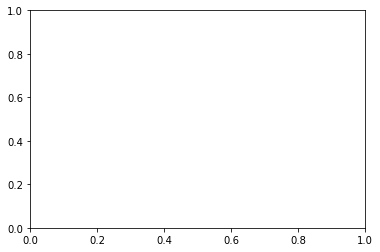

In [157]:
plt.scatter(X_test_a, y_test_a, color="blue", label="original")
plt.plot(X_test_a, yhat_a, color="red", label="predicted")
plt.legend()
plt.show() 

ValueError: x and y must be the same size

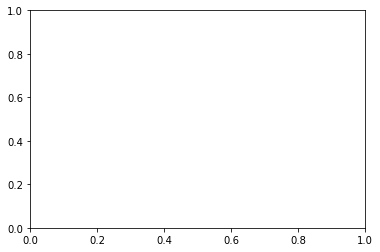

In [151]:
plt.scatter(X_test_a, y_test_a)
sns.lineplot(X_test_a, yhat,color='red');

In [200]:
rms_a = mean_squared_error(y_test_a, yhat_a, squared=False)
rms_a

246153.91528247955

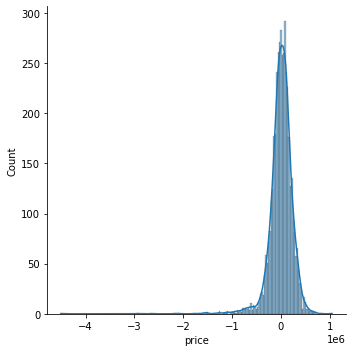

In [27]:
sns.displot(x=resid_a,kind='hist',kde=True);

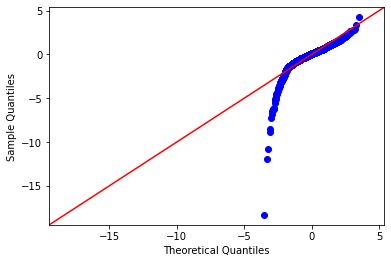

In [28]:
fig = sm.graphics.qqplot(resid_a, dist=stats.norm, line='45',fit=True)

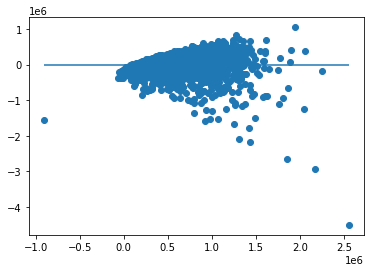

In [29]:
plt.scatter(yhat_a, resid_a)
plt.hlines(y=0, xmin=yhat_a.min(), xmax=yhat_a.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

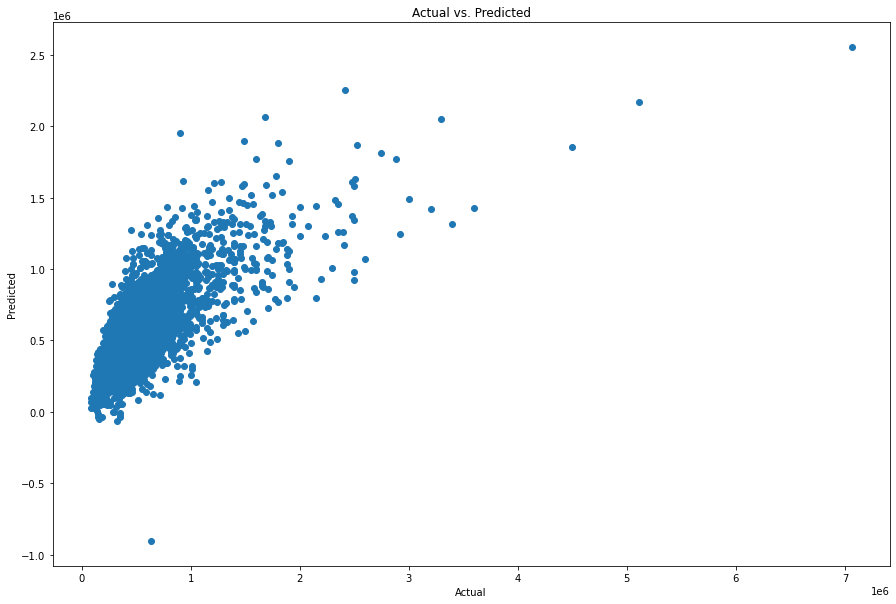

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_a, yhat_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

### Cross Validation

In [31]:
model_a_scores = cross_val_score(simple_model, X_test_a, y_test_a, cv=5)
model_a_scores

array([0.52194145, 0.50012173, 0.55545965, 0.50878098, 0.56754696])

In [32]:
model_a_scores.mean(), model_a_scores.std()

(0.5307701563961759, 0.026316914174252436)

# Model B

## Feature Engineering

### Create Dummy Variables

In [33]:
df_filtered['yr_built'] = df_filtered['yr_built'].astype('str')
df_filtered['zipcode'] = df_filtered['zipcode'].astype('str')
df_filtered['floors'] = df_filtered['floors'].astype('str')

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  object 
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   sqft_above   21597 non-null  int64  
 9   yr_built     21597 non-null  object 
 10  zipcode      21597 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [34]:
zip_dummies = pd.get_dummies(df_filtered['zipcode'], prefix='zip', drop_first=True)
yr_dummies = pd.get_dummies(df_filtered['yr_built'], prefix='yr', drop_first=True)
floor_dummies = pd.get_dummies(df_filtered['floors'], prefix='flr', drop_first=True)

In [35]:
df_dummies = df_filtered.drop(['zipcode','yr_built','floors'], axis=1)

In [36]:
df_dummies = pd.concat([df_filtered, zip_dummies, yr_dummies, floor_dummies], axis=1)
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,...,0,0,0,0,0,0,0,0,0,0


### Remove Outliers

In [37]:
df_dummies.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,zip_98002,zip_98003,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,3.409825,7.657915,1788.596842,0.009214,0.012965,...,0.006019,0.007871,0.009307,0.025883,0.00176,0.088438,0.381303,0.007455,0.028291,0.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.650546,1.173200,827.759761,0.095550,0.113125,...,0.077352,0.088373,0.096024,0.158791,0.04191,0.283938,0.485718,0.086020,0.165807,0.018001
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,3.000000,7.000000,1190.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,3.000000,7.000000,1560.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,4.000000,8.000000,2210.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,5.000000,13.000000,9410.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Log Transformations

In [38]:
logsqft = np.log(df_filtered['sqft_living'])

### Feature Scaling

In [39]:
scaled_sqft = (logsqft-np.mean(logsqft))/np.sqrt(np.var(logsqft))

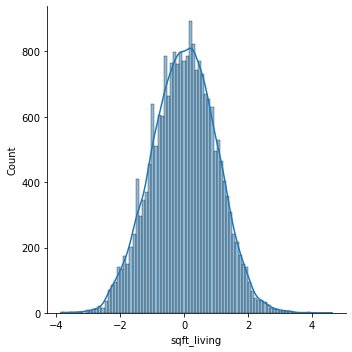

In [40]:
sns.displot(x=scaled_sqft,kind='hist',kde=True);

## Model B Training

In [41]:
price_b = df_dummies['price']
bedrooms_b = df_dummies['bedrooms']
bathrooms_b = df_dummies['bathrooms']
scaled_sqft
zip_dummies
yr_dummies

,yr_1901,yr_1902,yr_1903,yr_1904,yr_1905,yr_1906,yr_1907,yr_1908,yr_1909,yr_1910,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
model_b = pd.concat([price_b, bedrooms_b, bathrooms_b, scaled_sqft, zip_dummies, yr_dummies], axis=1)
model_b.head()

,price,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
0,221900.0,3,1.00,-1.125582,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,0.709463,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,-2.131943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,0.070676,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,-0.292732,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data into Training and Test Set

In [43]:
target_b = model_b['price']
features_b = model_b.drop(['price'], axis=1)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features_b,target_b,test_size=0.2,random_state=42)
X_train_b.head()

,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
6243,4,2.00,-0.656140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8986,3,1.75,-0.672568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,4,2.75,1.166643,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10155,4,2.50,0.187988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,3,2.00,0.644360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
outcome_b = 'y_train_b'
predictors_b = X_train_b
pred_sum_b = '+'.join(predictors_b.columns)
formula_b = outcome_b + '~' + pred_sum_b

In [45]:
data_b = pd.concat([X_train_b,y_train_b], axis=1)
data_b.head()

,bedrooms,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,price
6243,4,2.00,-0.656140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,332500.0
8986,3,1.75,-0.672568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,390000.0
9419,4,2.75,1.166643,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,800000.0
10155,4,2.50,0.187988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,462000.0
10436,3,2.00,0.644360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,695000.0


In [46]:
model_b_ols = ols(formula=formula_b, data=data_b).fit()
model_b_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_b   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:01:34   Log-Likelihood:            -2.3627e+05
No. Observations:               17277   AIC:                         4.729e+05
Df Residuals:                   17089   BIC:                         4.744e+05
Df Model:                         187                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.618e+05   3.03e+04     11.936      0.000    3.02e+05    4.21e+05
bedrooms    -4.467e+04   2444.759    -18.274      0.000   -4.95e+04   -3.99e+04
bathrooms    9.193e+04   3819.465     24.068      0.000    8.44e+04    9.94e+04
sqft_living  1.833e+05   2947.122     62.196      0.000    1.78e+05    1.89e+05
zip_98002    1.586e+04   2.15e+04      0.739      0.460   -2.62e+04    5.79e+04
zip_98003    2.188e+04   1.91e+04      1.146      0.252   -1.55e+04    5.93e+04
zip_98004    8.388e+05   1.87e+04     44.938      0.000    8.02e+05    8.75e+05
zip_98005    3.824e+05   2.23e+04     17.142      0.000    3.39e+05    4.26e+05
zip_98006     3.78e+05   1.68e+04     22.534      0.000    3.45e+05    4.11e+05
zip_98007    2.855e+05   2.38e+04     12.016      0.000    2.39e+05    3.32e+05
zip_98008    3.343e+05   1.91e+04     17.512      0.000    2.97e+05    3.72e+05
zip_98010    1.173e+05   2.64e+04      4.439      0.000    6.55e+04    1.69e+05
zip_98011    1.253e+05   2.13e+04      5.872      0.000    8.35e+04    1.67e+05
zip_98014    1.317e+05   2.42e+04      5.449      0.000    8.43e+04    1.79e+05
zip_98019    7.375e+04   2.15e+04      3.430      0.001    3.16e+04    1.16e+05
zip_98022    4.819e+04   2.01e+04      2.392      0.017    8700.645    8.77e+04
zip_98023    5329.6354   1.65e+04      0.324      0.746   -2.69e+04    3.76e+04
zip_98024    2.161e+05   2.84e+04      7.611      0.000     1.6e+05    2.72e+05
zip_98027     2.06e+05   1.71e+04     12.048      0.000    1.72e+05     2.4e+05
zip_98028    1.233e+05    1.9e+04      6.492      0.000    8.61e+04    1.61e+05
zip_98029    2.293e+05   1.85e+04     12.370      0.000    1.93e+05    2.66e+05
zip_98030     404.5698   1.97e+04      0.021      0.984   -3.82e+04     3.9e+04
zip_98031    1.157e+04    1.9e+04      0.607      0.544   -2.58e+04    4.89e+04
zip_98032    3.323e+04   2.48e+04      1.341      0.180   -1.53e+04    8.18e+04
zip_98033    4.154e+05   1.72e+04     24.159      0.000    3.82e+05    4.49e+05
zip_98034    2.313e+05   1.62e+04     14.307      0.000       2e+05    2.63e+05
zip_98038     1.82e+04   1.61e+04      1.128      0.260   -1.34e+04    4.98e+04
zip_98039    1.576e+06   3.46e+04     45.520      0.000    1.51e+06    1.64e+06
zip_98040    6.862e+05   1.92e+04     35.761      0.000    6.49e+05    7.24e+05
zip_98042    2.603e+04   1.63e+04      1.601      0.109   -5843.885    5.79e+04
zip_98045    1.337e+05      2e+04      6.680      0.000    9.45e+04    1.73e+05
zip_98052    2.597e+05   1.61e+04     16.125      0.000    2.28e+05    2.91e+05
zip_98053    2.493e+05   1.76e+04     14.149      0.000    2.15e+05    2.84e+05
zip_98055    4.174e+04    1.9e+04      2.195      0.028    4474.820     7.9e+04
zip_98056    1.207e+05   1.73e+04      6.968      0.000    8.68e+04    1.55e+05
zip_98058    5.352e+04    1.7e+04      3.15

In [47]:
model_b_ols.pvalues

Intercept       1.038441e-32
bedrooms        6.793280e-74
bathrooms      6.673781e-126
sqft_living     0.000000e+00
zip_98002       4.600046e-01
                   ...      
yr_2011         1.829091e-04
yr_2012         2.396926e-04
yr_2013         7.873541e-04
yr_2014         5.804842e-04
yr_2015         1.306301e-02
Length: 188, dtype: float64

## Model B Evaluation

In [49]:
model_b_lr = LinearRegression()
model_b_lr.fit(X_train_b,y_train_b)

LinearRegression()

In [50]:
model_b_lr.intercept_

361785.639455308

In [51]:
yhat_b = model_b_lr.predict(X_test_b)
print(yhat_b)

[ 68403.23715905 497190.66216162 423114.77650955 ... 540093.60164219
 360553.0655224  376005.28235794]


In [52]:
resid_b = yhat_b - y_test_b
resid_b

3686     -64096.762841
10247     82190.662162
4037     -70885.223490
3437    -152992.576191
19291   -106572.175726
             ...      
2522     -86194.544839
11119     29346.889057
11973    103093.601642
17601     67553.065522
19844     82538.282358
Name: price, Length: 4320, dtype: float64

In [201]:
rms_b = mean_squared_error(y_test_b, yhat_b, squared=False)
rms_b

215125.46984048572

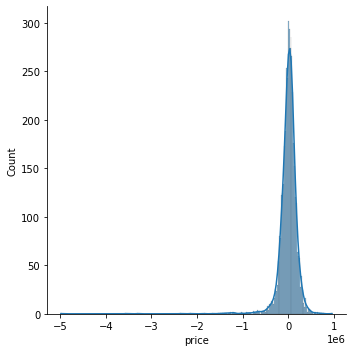

In [53]:
sns.displot(x=resid_b,kind='hist',kde=True);

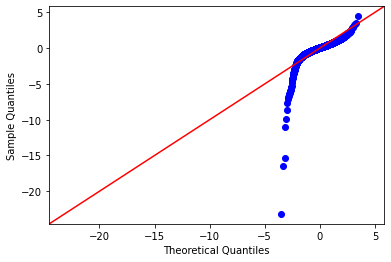

In [54]:
fig = sm.graphics.qqplot(resid_b, dist=stats.norm, line='45',fit=True)

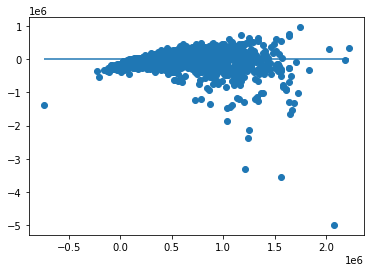

In [55]:
plt.scatter(yhat_b, resid_b)
plt.hlines(y=0, xmin=yhat_b.min(), xmax=yhat_b.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

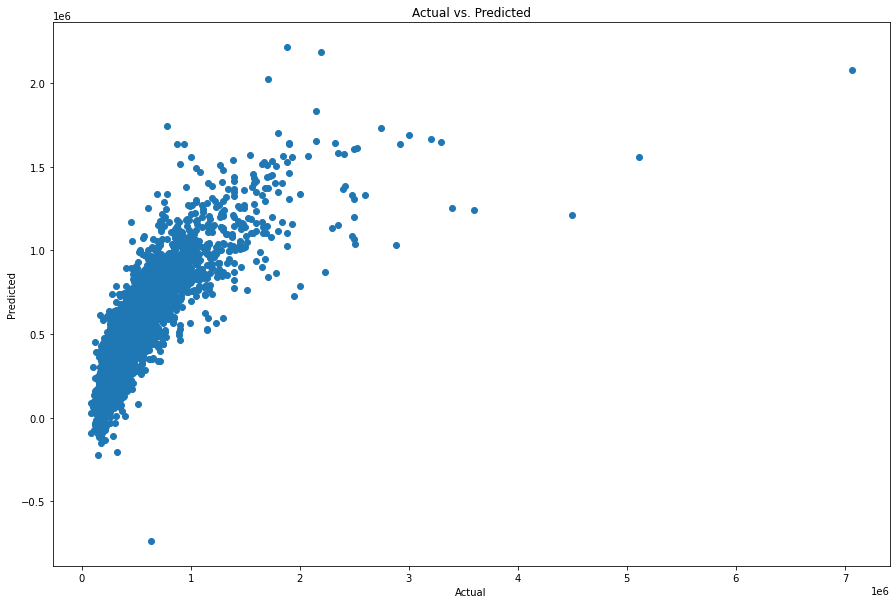

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_b, yhat_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [208]:
model_b_scores = cross_val_score(model_b_lr, X_test_b, y_test_b, cv=5)
model_b_scores

array([-9.21738183e+23,  6.92682928e-01,  6.82867437e-01,  5.57925801e-01,
       -1.55906199e+23])

In [209]:
model_b_scores.mean(), model_b_scores.std()

(-2.1552887642395287e+23, 3.582302440104358e+23)

# Model C

## Feature Engineering

In [67]:
log_grade = np.log(df_outliers['grade'])

In [68]:
scaled_grade = (log_grade-np.mean(log_grade))/np.sqrt(np.var(log_grade))

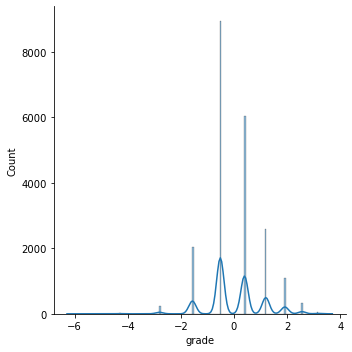

In [69]:
sns.displot(x=scaled_grade,kind='hist',kde=True);

In [70]:
log_sqft = np.log(df_outliers['sqft_living'])

In [71]:
scaled_sqft_c = (log_sqft-np.mean(log_sqft))/np.sqrt(np.var(log_sqft))

## Remove Outliers

In [ ]:
df_filtered.bathrooms.mean()

In [ ]:
df_filtered.bedrooms.mean()

In [ ]:
df_filtered.bedrooms.std()

In [ ]:
df_filtered.bathrooms.std()

In [62]:
upper_limit = df_filtered.bathrooms.mean() + 3*df_filtered.bathrooms.std()
upper_limit

4.422779162125593

In [63]:
upper_limit_beds = df_filtered.bedrooms.mean() + 3*df_filtered.bedrooms.std()
upper_limit_beds

6.152096665105352

In [64]:
lower_limit = df_filtered.bathrooms.mean() - 3*df_filtered.bathrooms.std()
lower_limit

-0.19112661779073248

In [65]:
lower_limit_beds = df_filtered.bedrooms.mean() - 3*df_filtered.bedrooms.std()
lower_limit_beds

0.5943032978524658

In [126]:
df_outliers=df_filtered[(df_filtered.bathrooms<upper_limit) & (df_filtered.bathrooms>lower_limit) 
                        & (df_filtered.bedrooms<upper_limit_beds) & (df_filtered.bedrooms>lower_limit_beds)]
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21363 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21363 non-null  float64
 1   bedrooms     21363 non-null  int64  
 2   bathrooms    21363 non-null  float64
 3   sqft_living  21363 non-null  int64  
 4   sqft_lot     21363 non-null  int64  
 5   floors       21363 non-null  object 
 6   condition    21363 non-null  int64  
 7   grade        21363 non-null  int64  
 8   sqft_above   21363 non-null  int64  
 9   yr_built     21363 non-null  object 
 10  zipcode      21363 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 2.0+ MB


In [92]:
zip_dummies_c = pd.get_dummies(df_outliers['zipcode'], prefix='zip', drop_first=True)
yr_dummies_c = pd.get_dummies(df_outliers['yr_built'], prefix='yr', drop_first=True)
floor_dummies_c = pd.get_dummies(df_outliers['floors'], prefix='flr', drop_first=True)

In [93]:
updated_zip_c = zip_dummies_c.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
updated_zip_c.head()

,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98024,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
updated_yr_c = yr_dummies_c.drop(['yr_1901','yr_1902','yr_1903','yr_1904','yr_1905','yr_1906','yr_1907','yr_1908',
                             'yr_1909','yr_1910','yr_1911','yr_1912','yr_1913','yr_1914','yr_1915','yr_1916',
                             'yr_1917','yr_1918','yr_1919','yr_1920','yr_1921','yr_1922','yr_1923','yr_1924',
                             'yr_1925','yr_1926','yr_1927','yr_1928','yr_1930','yr_1931','yr_1932','yr_1933',
                             'yr_1934','yr_1935','yr_1936','yr_1937','yr_1938','yr_1939','yr_1940','yr_1941',
                             'yr_1942','yr_1943','yr_1944','yr_1945','yr_1946','yr_1947','yr_1948','yr_1949',
                             'yr_1950','yr_1951','yr_1952'], axis=1)
updated_yr_c.head()

,yr_1929,yr_1953,yr_1954,yr_1955,yr_1956,yr_1957,yr_1958,yr_1959,yr_1960,yr_1961,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
model_c = pd.DataFrame([])
price_c = df_outliers['price']
bathrooms_c = df_outliers['bathrooms']
bedrooms_c = df_outliers['bedrooms']
scaled_grade
scaled_sqft_c
updated_zip_c
updated_yr_c

,yr_1929,yr_1953,yr_1954,yr_1955,yr_1956,yr_1957,yr_1958,yr_1959,yr_1960,yr_1961,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model C Training

In [107]:
model_c = pd.concat([price_c, bathrooms_c, bedrooms_c, scaled_grade, scaled_sqft_c, updated_zip_c, updated_yr_c], axis=1)
model_c.head()

,price,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
0,221900.0,1.00,3,-0.517587,-1.126726,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,2.25,3,-0.517587,0.746830,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,1.00,2,-1.567526,-2.154206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,3.00,4,-0.517587,0.094637,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,2.00,3,0.391912,-0.276397,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
model_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21363 entries, 0 to 21596
Columns: 121 entries, price to yr_2015
dtypes: float64(4), int64(1), uint8(116)
memory usage: 4.0 MB


In [109]:
target_c = model_c['price']
features_c = model_c.drop(['price'], axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(features_c,target_c,test_size=0.2,random_state=42)
X_train_c.head()

,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
10446,2.50,3,1.194147,0.670714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17744,1.00,3,0.391912,-0.533181,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17873,1.00,2,-1.567526,-2.675724,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14878,1.00,2,-1.567526,-2.315808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9672,2.75,5,1.194147,1.182546,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
outcome_c = 'y_train_c'
predictors_c = X_train_c
pred_sum_c = '+'.join(predictors_c.columns)
formula_c = outcome_c + '~' + pred_sum_c

In [111]:
data_c = pd.concat([X_train_c,y_train_c], axis=1)
data_c.head()

,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,price
10446,2.50,3,1.194147,0.670714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,654300.0
17744,1.00,3,0.391912,-0.533181,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,310000.0
17873,1.00,2,-1.567526,-2.675724,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,255000.0
14878,1.00,2,-1.567526,-2.315808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195000.0
9672,2.75,5,1.194147,1.182546,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,475000.0


In [112]:
model_c_ols = ols(formula=formula_c, data=data_c).fit()
model_c_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_c   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     369.1
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:18   Log-Likelihood:            -2.3050e+05
No. Observations:               17090   AIC:                         4.612e+05
Df Residuals:                   16969   BIC:                         4.622e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.718e+05   9606.832     49.107      0.000    4.53e+05    4.91e+05
bathrooms    5.255e+04   3324.000     15.809      0.000     4.6e+04    5.91e+04
bedrooms    -2.877e+04   2122.729    -13.554      0.000   -3.29e+04   -2.46e+04
grade        1.077e+05   2357.028     45.711      0.000    1.03e+05    1.12e+05
sqft_living  1.139e+05   2809.420     40.547      0.000    1.08e+05    1.19e+05
zip_98004    7.462e+05   1.21e+04     61.568      0.000    7.22e+05     7.7e+05
zip_98005    2.926e+05   1.67e+04     17.482      0.000     2.6e+05    3.25e+05
zip_98006    2.953e+05   9702.225     30.439      0.000    2.76e+05    3.14e+05
zip_98007    2.156e+05   1.72e+04     12.546      0.000    1.82e+05    2.49e+05
zip_98008     2.57e+05   1.23e+04     20.937      0.000    2.33e+05    2.81e+05
zip_98010    1.018e+05   2.15e+04      4.740      0.000    5.97e+04    1.44e+05
zip_98011    9.648e+04   1.41e+04      6.863      0.000    6.89e+04    1.24e+05
zip_98014    1.228e+05   1.84e+04      6.665      0.000    8.67e+04    1.59e+05
zip_98019    7.643e+04   1.49e+04      5.117      0.000    4.72e+04    1.06e+05
zip_98024     1.61e+05   2.24e+04      7.180      0.000    1.17e+05    2.05e+05
zip_98027    1.556e+05   1.02e+04     15.205      0.000    1.36e+05    1.76e+05
zip_98028    8.987e+04    1.2e+04      7.496      0.000    6.64e+04    1.13e+05
zip_98029    1.648e+05   1.15e+04     14.322      0.000    1.42e+05    1.87e+05
zip_98033    3.504e+05      1e+04     34.911      0.000    3.31e+05     3.7e+05
zip_98034    1.967e+05   9061.832     21.708      0.000    1.79e+05    2.14e+05
zip_98039    1.156e+06   2.95e+04     39.147      0.000     1.1e+06    1.21e+06
zip_98040    5.219e+05   1.26e+04     41.545      0.000    4.97e+05    5.47e+05
zip_98045    1.002e+05   1.39e+04      7.193      0.000    7.29e+04    1.28e+05
zip_98052    2.053e+05   8743.375     23.482      0.000    1.88e+05    2.22e+05
zip_98053    2.196e+05   1.03e+04     21.228      0.000    1.99e+05     2.4e+05
zip_98056     9.87e+04   1.01e+04      9.763      0.000    7.89e+04    1.19e+05
zip_98059    8.616e+04   9650.169      8.928      0.000    6.72e+04    1.05e+05
zip_98065    9.501e+04    1.2e+04      7.894      0.000    7.14e+04    1.19e+05
zip_98070    1.599e+05    1.8e+04      8.892      0.000    1.25e+05    1.95e+05
zip_98072    1.399e+05   1.23e+04     11.360      0.000    1.16e+05    1.64e+05
zip_98074    1.774e+05      1e+04     17.666      0.000    1.58e+05    1.97e+05
zip_98075    2.232e+05   1.09e+04     20.477      0.000    2.02e+05    2.45e+05
zip_98077    1.483e+05   1.47e+04     10.098      0.000     1.2e+05    1.77e+05
zip_98102    3.784e+05   2.03e+04     18.676      0.000    3.39e+05    4.18e+05
zip_98103    2.381e+05   8879.611     26.818      0.000    2.21e+05    2.56e+05
zip_98105    3.725e+05   1.39e+04     26.81

In [113]:
model_c_lr = LinearRegression()
model_c_lr.fit(X_train_c,y_train_c)

LinearRegression()

In [114]:
model_c_lr.intercept_

471758.27538642846

## Model C Evaluation

In [115]:
yhat_c = model_c_lr.predict(X_test_c)
print(yhat_c)

[746942.34326183 583514.15343041 261984.11410302 ... 867580.86109856
 310798.61990913 277929.44092277]


In [116]:
resid_c = yhat_c - y_test_c
resid_c

21001    196942.343262
5264      68414.153430
16200    -13015.885897
1303      78827.596308
2141      16558.749471
             ...      
11068     73827.443890
8547    -147985.383677
20666    -55174.138901
16442   -159201.380091
17241     22979.440923
Name: price, Length: 4273, dtype: float64

In [202]:
rms_c = mean_squared_error(y_test_c, yhat_c, squared=False)
rms_c

172710.76680618644

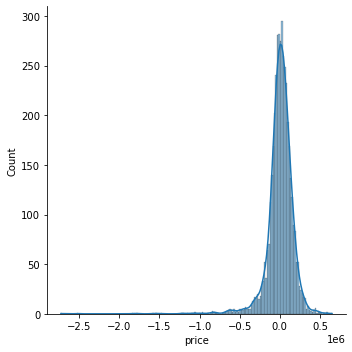

In [117]:
sns.displot(x=resid_c,kind='hist',kde=True);

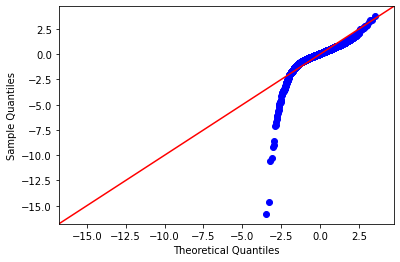

In [118]:
fig = sm.graphics.qqplot(resid_c, dist=stats.norm, line='45',fit=True)

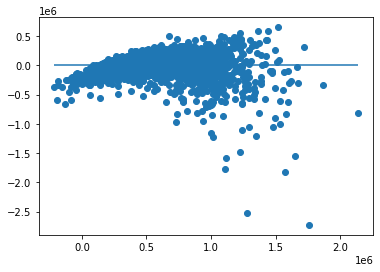

In [119]:
plt.scatter(yhat_c, resid_c)
plt.hlines(y=0, xmin=yhat_c.min(), xmax=yhat_c.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

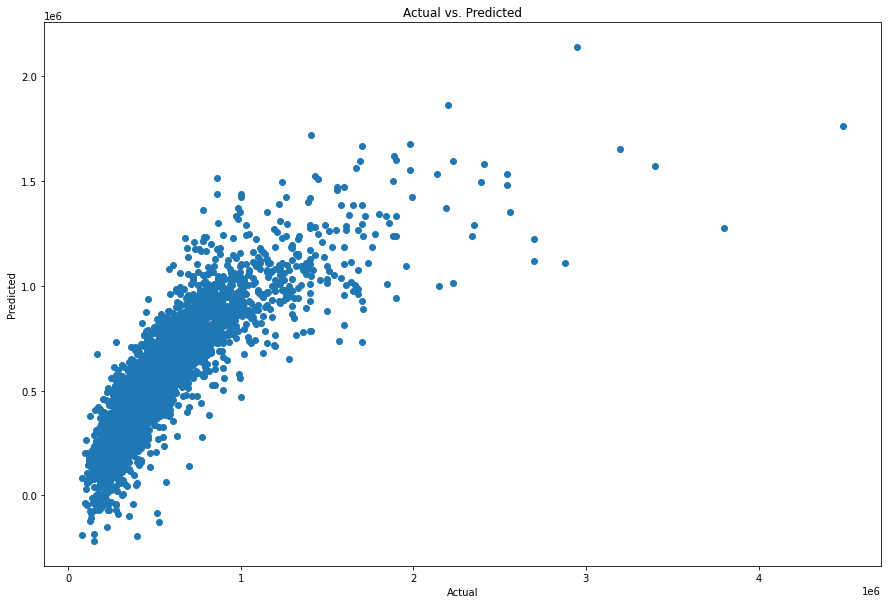

In [120]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_c, yhat_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [203]:
model_c_scores = cross_val_score(model_c_lr, X_test_c, y_test_c, cv=5)
model_c_scores

array([0.70601819, 0.6924605 , 0.72181109, 0.70772252, 0.70107078])

In [204]:
model_c_scores.mean(), model_c_scores.std()

(0.7058166177870238, 0.00959588732220388)

# Model D

## Feature Engineering

### Remove Outliers

In [121]:
df_filtered.sqft_living.std()

918.1061250800805

In [122]:
upper_limit_sqft = df_filtered.sqft_living.mean() + 3*df_filtered.sqft_living.std()
upper_limit_sqft

4834.640225497222

In [123]:
lower_limit_sqft = df_filtered.sqft_living.mean() - 3*df_filtered.sqft_living.std()
lower_limit_sqft

-673.9965249832612

In [130]:
df_filtered.sqft_lot.std()

41412.636875502074

In [131]:
upper_limit_lot = df_filtered.sqft_lot.mean() + 3*df_filtered.sqft_lot.std()
upper_limit_lot

139337.3193869822

In [132]:
lower_limit_lot = df_filtered.sqft_lot.mean() - 3*df_filtered.sqft_lot.std()
lower_limit_lot

-109138.50186603024

In [133]:
df_outliers_2=df_outliers[(df_filtered.sqft_living<upper_limit_sqft) & (df_filtered.sqft_living>lower_limit_sqft) 
                         & (df_filtered.sqft_lot<upper_limit_lot) & (df_filtered.sqft_lot>lower_limit_lot)]
df_outliers_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20887 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20887 non-null  float64
 1   bedrooms     20887 non-null  int64  
 2   bathrooms    20887 non-null  float64
 3   sqft_living  20887 non-null  int64  
 4   sqft_lot     20887 non-null  int64  
 5   floors       20887 non-null  object 
 6   condition    20887 non-null  int64  
 7   grade        20887 non-null  int64  
 8   sqft_above   20887 non-null  int64  
 9   yr_built     20887 non-null  object 
 10  zipcode      20887 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.9+ MB


In [185]:
model_d = pd.DataFrame([])
price_d = df_outliers_2['price']
bathrooms_d = df_outliers_2['bathrooms']
bedrooms_d = df_outliers_2['bedrooms']
zip_dummies_d = pd.get_dummies(df_outliers_2['zipcode'], prefix='zip', drop_first=True)
yr_dummies_d = pd.get_dummies(df_outliers_2['yr_built'], prefix='yr', drop_first=True)
sqft_lot_d = df_outliers_2['sqft_lot']
sqft_living_d = df_outliers_2['sqft_living']
log_grade_d = np.log(df_outliers_2['grade'])
scaled_grade_d = (log_grade_d-np.mean(log_grade_d))/np.sqrt(np.var(log_grade_d))
log_lot_d = np.log(df_outliers_2['sqft_lot'])
scaled_lot_d = (log_lot_d-np.mean(log_lot_d))/np.sqrt(np.var(log_lot_d))

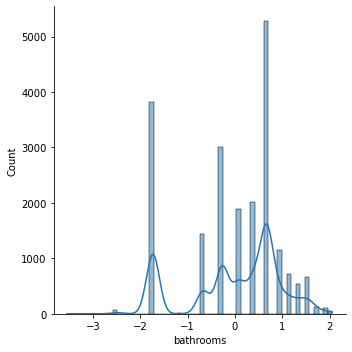

In [186]:
sns.displot(x=scaled_bath_d,kind='hist',kde=True);

In [135]:
updated_zip_d = zip_dummies_d.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
updated_yr_d = yr_dummies_d.drop(['yr_1901','yr_1902','yr_1903','yr_1904','yr_1905','yr_1906','yr_1907','yr_1908',
                             'yr_1909','yr_1910','yr_1911','yr_1912','yr_1913','yr_1914','yr_1915','yr_1916',
                             'yr_1917','yr_1918','yr_1919','yr_1920','yr_1921','yr_1922','yr_1923','yr_1924',
                             'yr_1925','yr_1926','yr_1927','yr_1928','yr_1930','yr_1931','yr_1932','yr_1933',
                             'yr_1934','yr_1935','yr_1936','yr_1937','yr_1938','yr_1939','yr_1940','yr_1941',
                             'yr_1942','yr_1943','yr_1944','yr_1945','yr_1946','yr_1947','yr_1948','yr_1949',
                             'yr_1950','yr_1951','yr_1952'], axis=1)

## Model D Training

In [192]:
model_d = pd.concat([price_d, bathrooms_d, bedrooms_d, scaled_grade_d, 
                     scaled_lot_d, sqft_living_d, updated_zip_d, updated_yr_d], axis=1)
model_d.head()

,price,bathrooms,bedrooms,grade,sqft_lot,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
0,221900.0,1.00,3,-0.505281,-0.358014,1180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,2.25,3,-0.505281,-0.043421,2570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,1.00,2,-1.579506,0.365517,770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,3.00,4,-0.505281,-0.512899,1960,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,2.00,3,0.425255,0.095340,1680,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
target_d = model_d['price']
features_d = model_d.drop(['price'], axis=1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(features_d,target_d,test_size=0.2,random_state=42)
X_train_d.head()

,bathrooms,bedrooms,grade,sqft_lot,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015
17439,3.00,6,0.425255,0.277359,2470,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19650,2.50,4,-0.505281,-0.667148,2070,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
410,2.50,3,-0.505281,0.103782,1550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,1.75,3,-0.505281,0.251973,1330,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11717,2.50,4,3.250805,2.910280,4570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
outcome_d = 'y_train_d'
predictors_d = X_train_d
pred_sum_d = '+'.join(predictors_d.columns)
formula_d = outcome_d + '~' + pred_sum_d

In [195]:
data_d = pd.concat([X_train_d,y_train_d], axis=1)
data_d.head()

,bathrooms,bedrooms,grade,sqft_lot,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,price
17439,3.00,6,0.425255,0.277359,2470,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,630000.0
19650,2.50,4,-0.505281,-0.667148,2070,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,425000.0
410,2.50,3,-0.505281,0.103782,1550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,268000.0
8832,1.75,3,-0.505281,0.251973,1330,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,400000.0
11717,2.50,4,3.250805,2.910280,4570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1580000.0


In [196]:
model_d_ols = ols(formula=formula_d, data=data_d).fit()
model_d_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_d   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     449.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:45:44   Log-Likelihood:            -2.2262e+05
No. Observations:               16709   AIC:                         4.455e+05
Df Residuals:                   16587   BIC:                         4.464e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.185e+05   7069.980     16.760      0.000    1.05e+05    1.32e+05
bathrooms    3.452e+04   2882.958     11.975      0.000    2.89e+04    4.02e+04
bedrooms    -2.935e+04   1782.472    -16.467      0.000   -3.28e+04   -2.59e+04
grade         7.21e+04   2001.763     36.018      0.000    6.82e+04     7.6e+04
sqft_lot     2.963e+04   1857.783     15.950      0.000     2.6e+04    3.33e+04
sqft_living   162.2693      2.987     54.324      0.000     156.414     168.124
zip_98004    6.838e+05   1.02e+04     67.137      0.000    6.64e+05    7.04e+05
zip_98005    2.898e+05   1.37e+04     21.223      0.000    2.63e+05    3.17e+05
zip_98006    2.854e+05   8367.232     34.105      0.000    2.69e+05    3.02e+05
zip_98007    2.331e+05   1.53e+04     15.234      0.000    2.03e+05    2.63e+05
zip_98008    2.659e+05   1.05e+04     25.379      0.000    2.45e+05    2.86e+05
zip_98010    6.545e+04   1.75e+04      3.748      0.000    3.12e+04    9.97e+04
zip_98011    1.115e+05   1.24e+04      8.959      0.000    8.71e+04    1.36e+05
zip_98014    8.088e+04   1.77e+04      4.562      0.000    4.61e+04    1.16e+05
zip_98019      6.8e+04   1.35e+04      5.027      0.000    4.15e+04    9.45e+04
zip_98024    9.916e+04   2.22e+04      4.473      0.000    5.57e+04    1.43e+05
zip_98027    1.533e+05   8907.558     17.206      0.000    1.36e+05    1.71e+05
zip_98028    1.009e+05   9952.389     10.142      0.000    8.14e+04     1.2e+05
zip_98029    2.043e+05   9788.861     20.875      0.000    1.85e+05    2.24e+05
zip_98033     3.52e+05   8550.999     41.166      0.000    3.35e+05    3.69e+05
zip_98034    1.918e+05   7862.970     24.388      0.000    1.76e+05    2.07e+05
zip_98039    1.111e+06   2.74e+04     40.523      0.000    1.06e+06    1.17e+06
zip_98040    5.274e+05   1.09e+04     48.202      0.000    5.06e+05    5.49e+05
zip_98045    7.079e+04   1.25e+04      5.673      0.000    4.63e+04    9.52e+04
zip_98052    2.157e+05   7530.898     28.639      0.000    2.01e+05     2.3e+05
zip_98053    1.834e+05   9254.122     19.821      0.000    1.65e+05    2.02e+05
zip_98056    1.053e+05   8625.283     12.210      0.000    8.84e+04    1.22e+05
zip_98059    7.472e+04   8120.507      9.201      0.000    5.88e+04    9.06e+04
zip_98065    9.075e+04   1.02e+04      8.920      0.000    7.08e+04    1.11e+05
zip_98070     1.11e+05   1.77e+04      6.274      0.000    7.63e+04    1.46e+05
zip_98072    1.281e+05   1.07e+04     11.976      0.000    1.07e+05    1.49e+05
zip_98074    1.776e+05   8515.790     20.860      0.000    1.61e+05    1.94e+05
zip_98075    2.022e+05   9580.687     21.101      0.000    1.83e+05    2.21e+05
zip_98077    1.048e+05   1.29e+04      8.121      0.000    7.95e+04     1.3e+05
zip_98102    4.471e+05   1.79e+04     25.006      0.000    4.12e+05    4.82e+05
zip_98103    3.071e+05   7885.477     38.94

In [173]:
model_d_lr = LinearRegression()
model_d_lr.fit(X_train_d,y_train_d)

LinearRegression()

In [174]:
model_d_lr.intercept_

118492.08607023896

## Model D Evalutation

In [175]:
yhat_d = model_d_lr.predict(X_test_d)
print(yhat_d)

[217876.15740559 674986.46255403 905689.27831538 ... 548467.0351713
 681314.0451895  827660.89646178]


In [176]:
resid_d = yhat_d - y_test_d
resid_d

3235     -53123.842594
8433      87536.462554
6907    -124310.721685
12997     44381.532303
7734      48850.908702
             ...      
5403      18201.845198
3075    -161413.299614
9745     143467.035171
3061     101314.045189
12124    252660.896462
Name: price, Length: 4178, dtype: float64

In [199]:
rms_d = mean_squared_error(y_test_d, yhat_d, squared=False)
rms_d

156864.28953939024

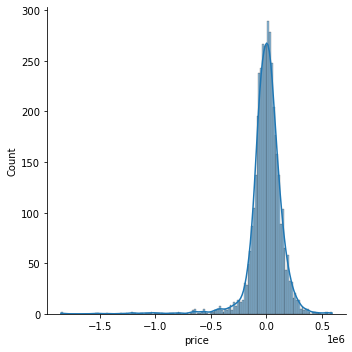

In [178]:
sns.displot(x=resid_d,kind='hist',kde=True);

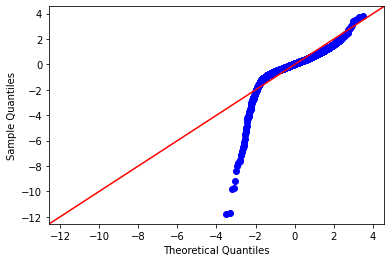

In [179]:
fig = sm.graphics.qqplot(resid_d, dist=stats.norm, line='45',fit=True)

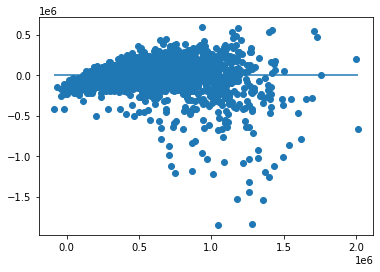

In [180]:
plt.scatter(yhat_d, resid_d)
plt.hlines(y=0, xmin=yhat_d.min(), xmax=yhat_d.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

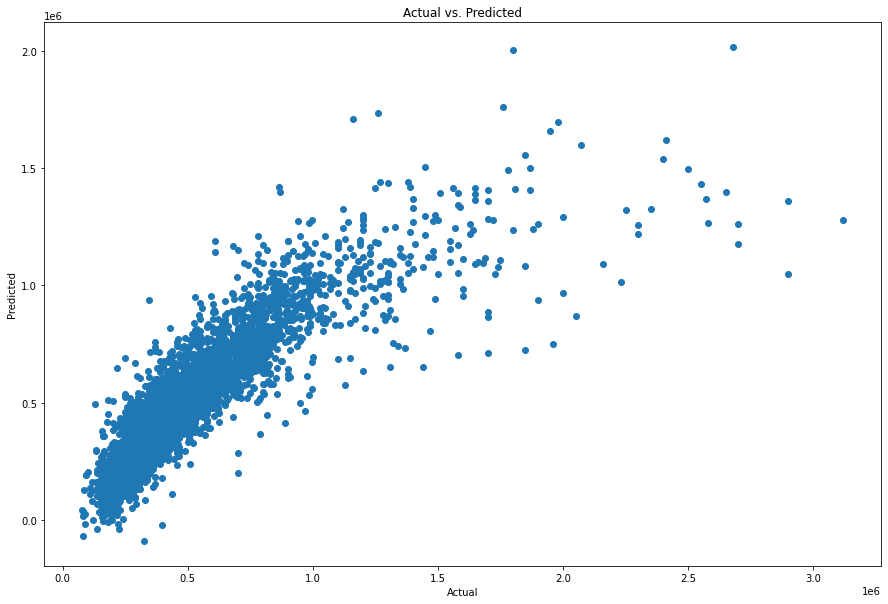

In [198]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_d, yhat_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [205]:
model_d_scores = cross_val_score(model_d_lr, X_test_d, y_test_d, cv=5)
model_d_scores

array([0.72573559, 0.70915303, 0.74796345, 0.76105813, 0.75972514])

In [206]:
model_d_scores.mean(), model_d_scores.std()

(0.7407270666325653, 0.02024010121543255)

## Conclusions/Summary